# Time Series Decomposition Methods
Time series decomposition is a statistical technique used to break down a time series data into its underlying components or sources of variation. The primary goal of time series decomposition is to separate the data into these components, which typically include:

__Trend Component:__ The trend component represents the long-term movement or direction in the time series data. It captures systematic and persistent changes over time, such as overall growth or decline. Trends can be linear, nonlinear, or seasonal trends, depending on the data.

__Seasonal Component:__ The seasonal component accounts for the regular, repeating patterns or cycles that occur within the time series. These patterns often have a fixed frequency, like daily, weekly, monthly, or annually, and are associated with external factors like seasons or holidays.

__Residual Component (or Error):__ The residual component, also known as the error or noise, includes any remaining variations in the data that cannot be attributed to the trend or seasonality. It represents the random or irregular fluctuations that are left unexplained by the trend and seasonal components.

Time series decomposition is a fundamental step in time series analysis and forecasting. By isolating these components, you can gain a clearer understanding of the underlying patterns and dynamics in the data. Here are some common methods and Python code implementations for time series decomposition. 

For these examples, I'll assume you have a time series dataset in a pandas DataFrame with a datetime index. If you don't have one, you can load your data into a DataFrame or use sample data for testing.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../dataset/final_df_002.csv")
df.columns

Index(['Date Time', 'Heater Heat Output', 'T.F Heater Outlet Flow Transmitter',
       'T.F. Heater Serpentine Coil Outlet Temperature',
       'Heater Outlet Flue Gas O2 Analyzer',
       'T.F. Heater Outlet Flue Gas Temperature',
       'Average T.F. Heater Outlet Temperature',
       'Average T.F. Heater Serpentine Coil Inlet Temperature',
       'Average Furnace Exit Temperature'],
      dtype='object')

## Simple Moving Average (SMA) Decomposition
You can use a simple moving average to decompose a time series. Time series data often contain noise, random fluctuations, and short-term variations that can make it difficult to discern underlying trends and patterns. Moving averages smooth out these fluctuations, making it easier to identify long-term trends and patterns in the data.

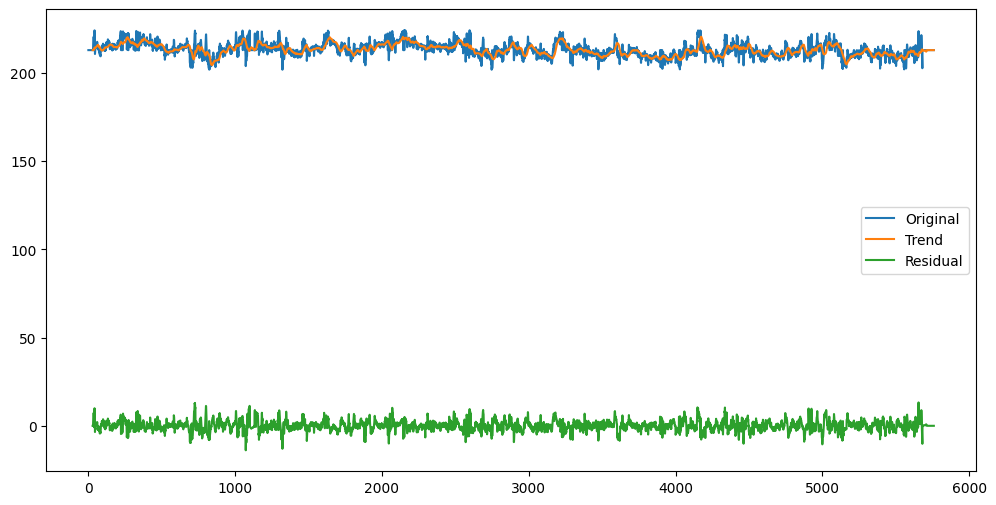

In [3]:
from pandas.plotting import autocorrelation_plot

# Assuming 'time_series' is the time series data
rolling_mean = df["Average T.F. Heater Serpentine Coil Inlet Temperature"].rolling(window=30).mean()  # Adjust window size as needed
residual = df["Average T.F. Heater Serpentine Coil Inlet Temperature"] - rolling_mean

# Plot the components
plt.figure(figsize=(12, 6))
plt.plot(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], label='Original')
plt.plot(rolling_mean, label='Trend')
plt.plot(residual, label='Residual')
plt.legend()
plt.show()

## Exponential Moving Average (EMA) Decomposition 
Similar to SMA, EMA smooths out the fluctuations in a time series. The difference is that a more recent data point is given greater weight in this type of moving average. EMAs are more responsive to recent changes in the data.

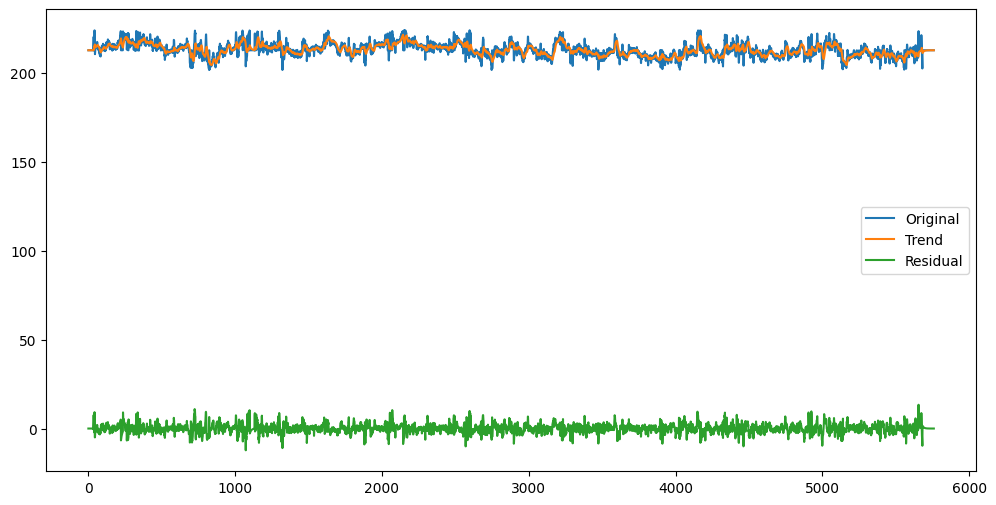

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit1 = SimpleExpSmoothing(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], initialization_method="heuristic").fit(
    smoothing_level=0.1, optimized=False
)
residual = df["Average T.F. Heater Serpentine Coil Inlet Temperature"] - fit1.fittedvalues
# Plot the components
plt.figure(figsize=(12, 6))
plt.plot(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], label='Original')
plt.plot(fit1.fittedvalues, label='Trend')
plt.plot(residual, label='Residual')
plt.legend()
plt.show()

## Seasonal Decomposition using Moving Averages

This is a naive decomposition. More sophisticated methods should be preferred.

The additive model is $Y[t] = T[t] + S[t] + e[t]$

The multiplicative model is $Y[t] = T[t] * S[t] * e[t]$

The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

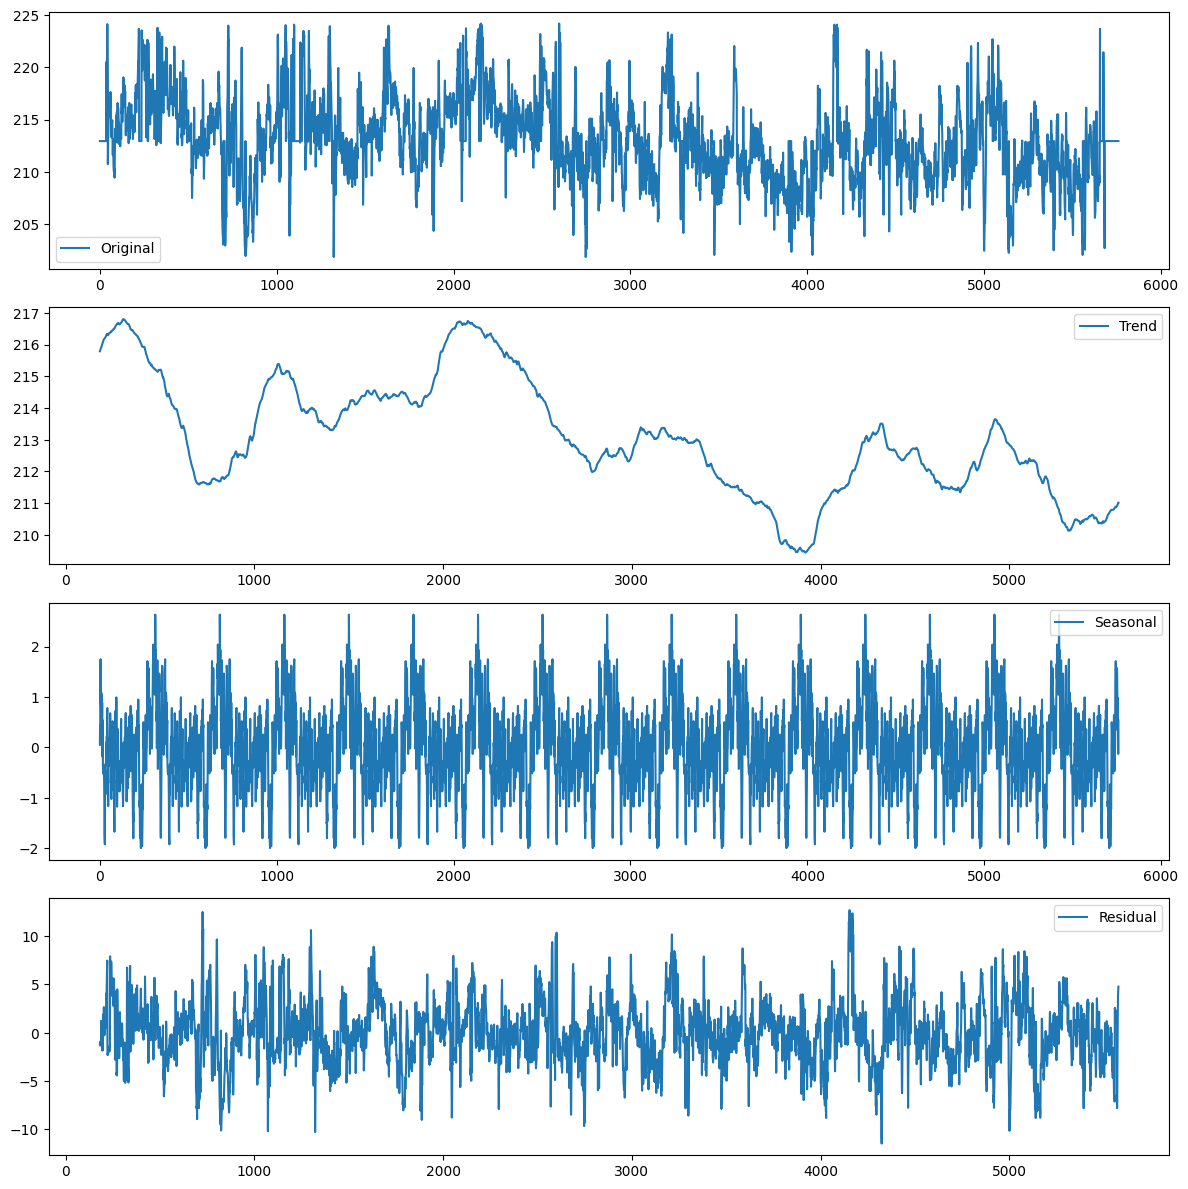

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], model='additive', period=365)
seasonal, trend, residual = decomposition.seasonal, decomposition.trend, decomposition.resid

plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


## Seasonal-Trend Decomposition using LOESS (STL)
The Seasonal-Trend decomposition using LOESS (locally estimated scatterplot smoothing) extract smooths estimates of the three components: trend, seasonal, and residual.

The key inputs into STL are:

seasonal - The length of the seasonal smoother. Must be odd.

trend - The length of the trend smoother, usually around 150% of season. Must be odd and larger than season.

low_pass - The length of the low-pass estimation window, usually the smallest odd number larger than the periodicity of the data.



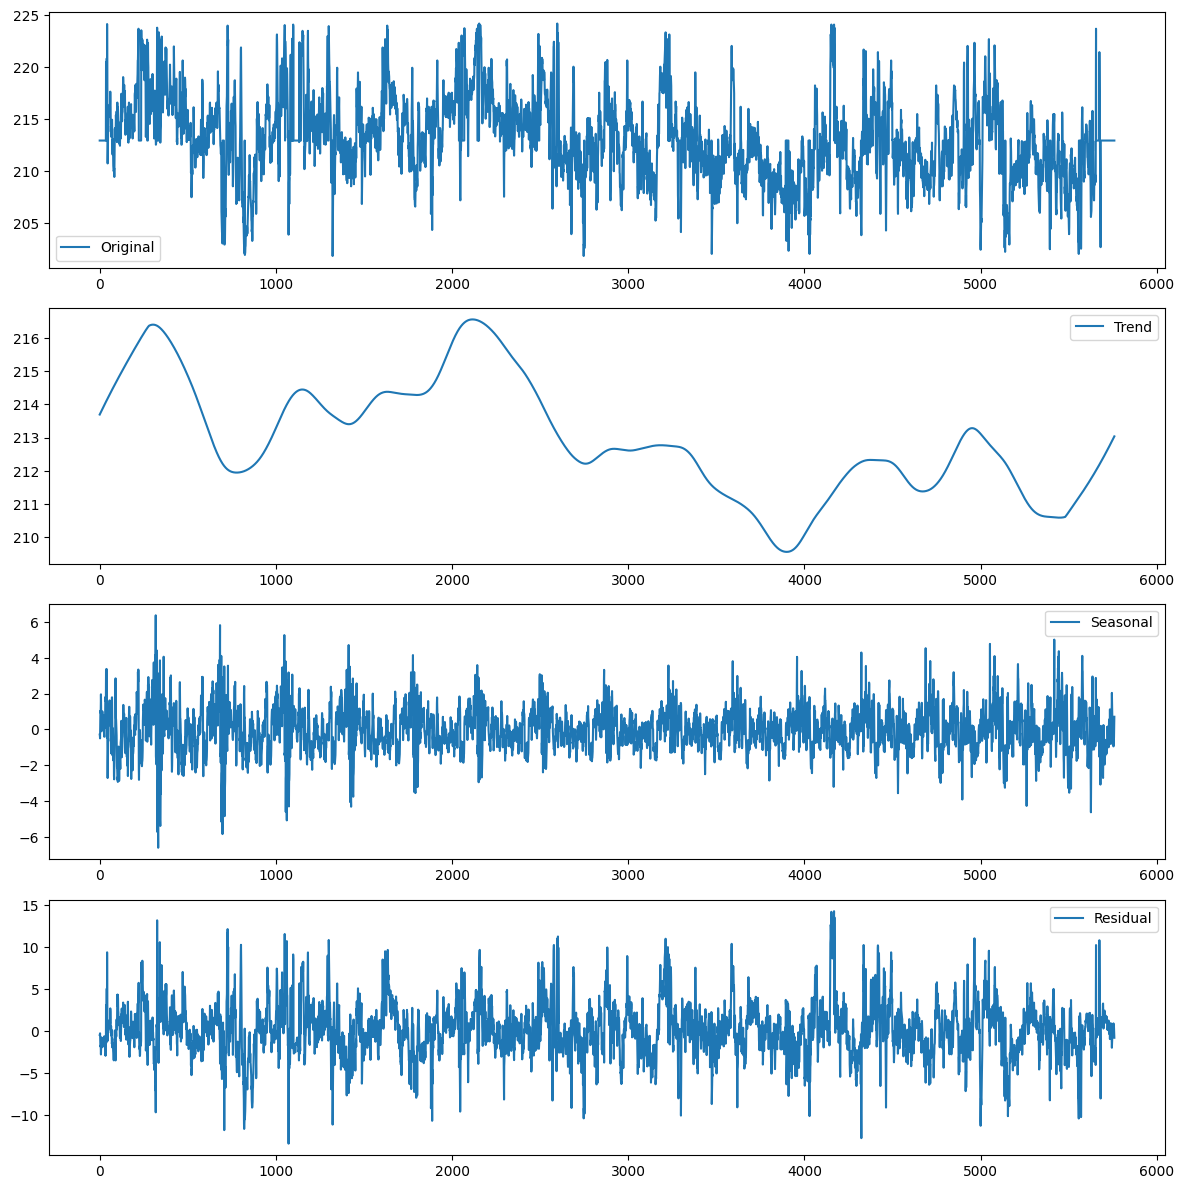

In [6]:
from statsmodels.tsa.seasonal import STL

# Assuming 'time_series' is the time series data
decomposition = STL(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], period = 365, seasonal = 75, robust = True).fit()
seasonal, trend, residual = decomposition.seasonal, decomposition.trend, decomposition.resid

# Plot the components
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

## Fast Fourier Transform
You can also use the Fast Fourier Transform to identify its dominant frequencies, which correspond to seasonality. The dominant frequencies can be used in decomposion methods to extract trend and seasonality. For example, the dominant frequency in the following example shows a period of 365 days.


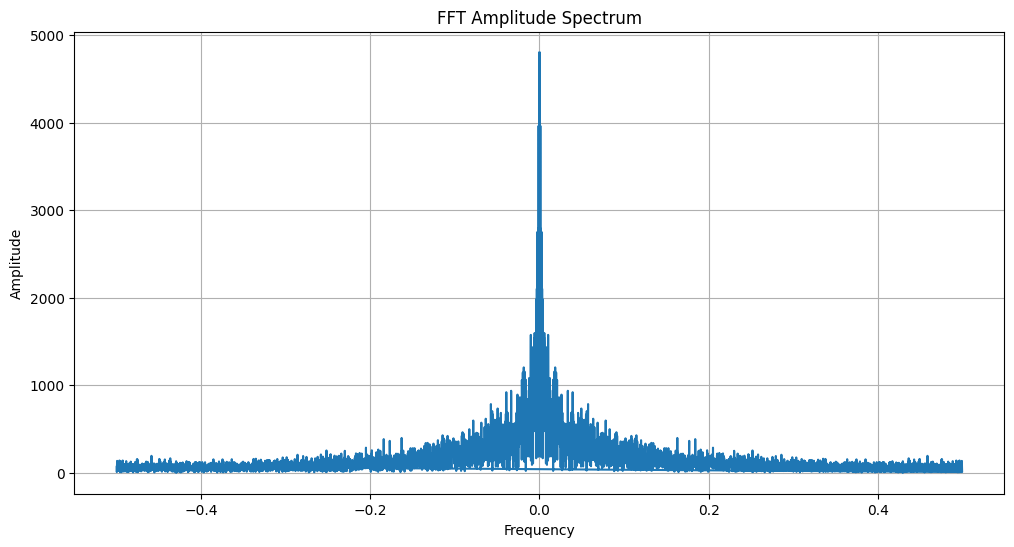

411.42857142857144


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load your time series data into a DataFrame (replace with your data)
# ts_data = pd.read_csv('your_time_series_data.csv', parse_dates=True, index_col='date_column')

# Perform FFT
fft_result = np.fft.fft(df["Average T.F. Heater Serpentine Coil Inlet Temperature"])
frequencies = np.fft.fftfreq(len(fft_result))

# Plot the amplitude spectrum (ignore the negative frequencies)
plt.figure(figsize=(12, 6))
plt.title('FFT Amplitude Spectrum')
plt.plot(frequencies[1:], np.abs(fft_result[1:]))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()
period = 1/frequencies[np.argmax(abs(fft_result[10:100]))+10]
print(period)

## Wavelet Decomposition
Wavelet decomposition can capture both high and low-frequency components.

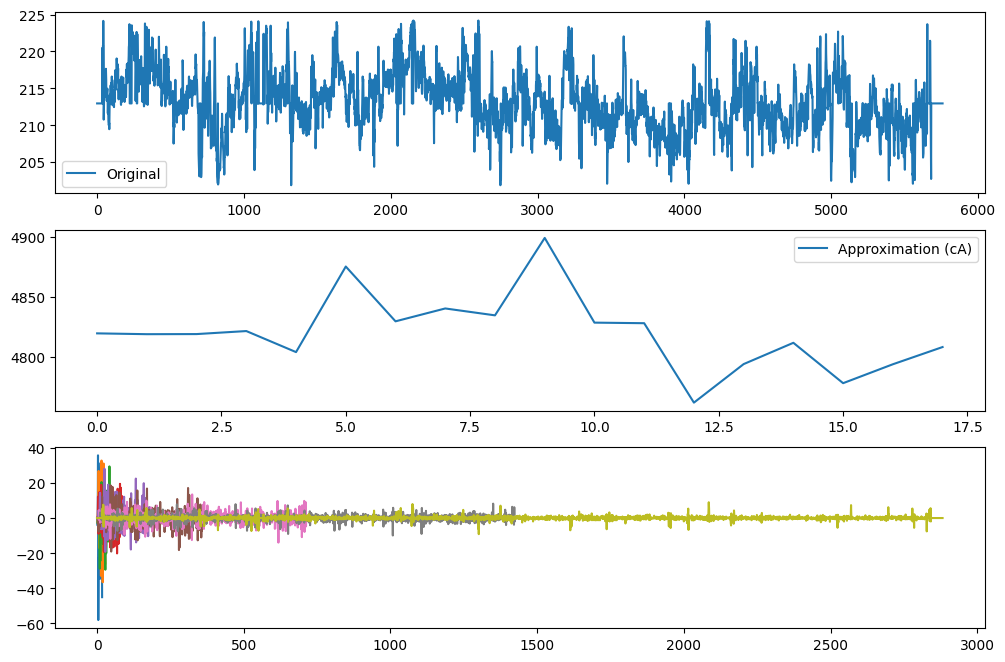

In [9]:
import pywt

# Assuming 'time_series' is the time series data
wavelet = 'db4'  # An appropriate wavelet
decomposition = pywt.wavedec(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], wavelet)
cA, cD = decomposition[0], decomposition[1:]

# Plot the components
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(df["Average T.F. Heater Serpentine Coil Inlet Temperature"], label='Original')
plt.legend()
plt.subplot(312)
plt.plot(cA, label='Approximation (cA)')
plt.legend()
plt.subplot(313)
for i, detail_level in enumerate(cD):
    plt.plot(detail_level, label = 'cD')


## FB Prophet
Facebook's Prophet is a powerful tool for time series forecasting and decomposition. It handles holidays, seasonality, and special events automatically.

19:50:58 - cmdstanpy - INFO - Chain [1] start processing
19:51:00 - cmdstanpy - INFO - Chain [1] done processing


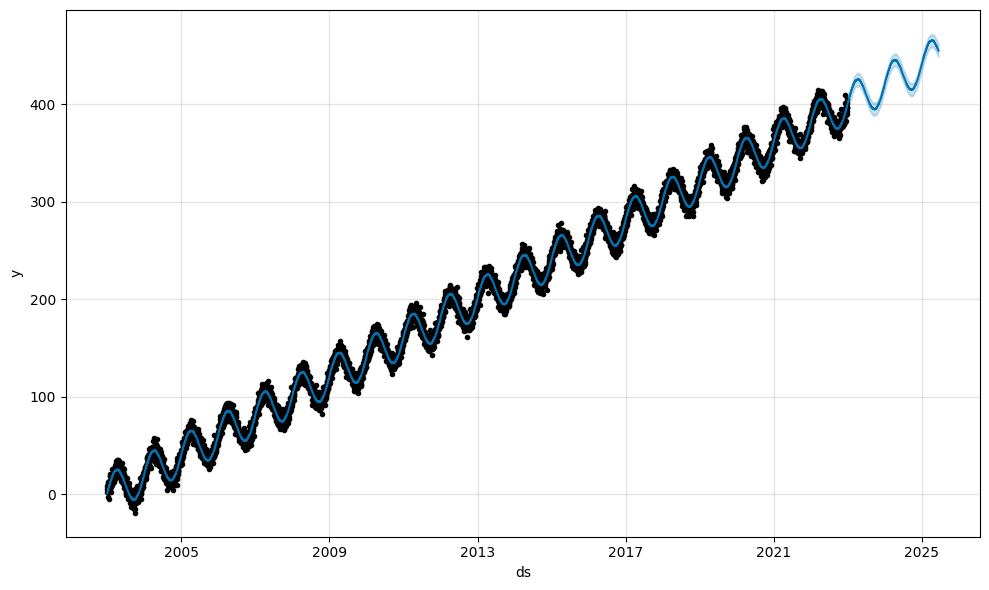

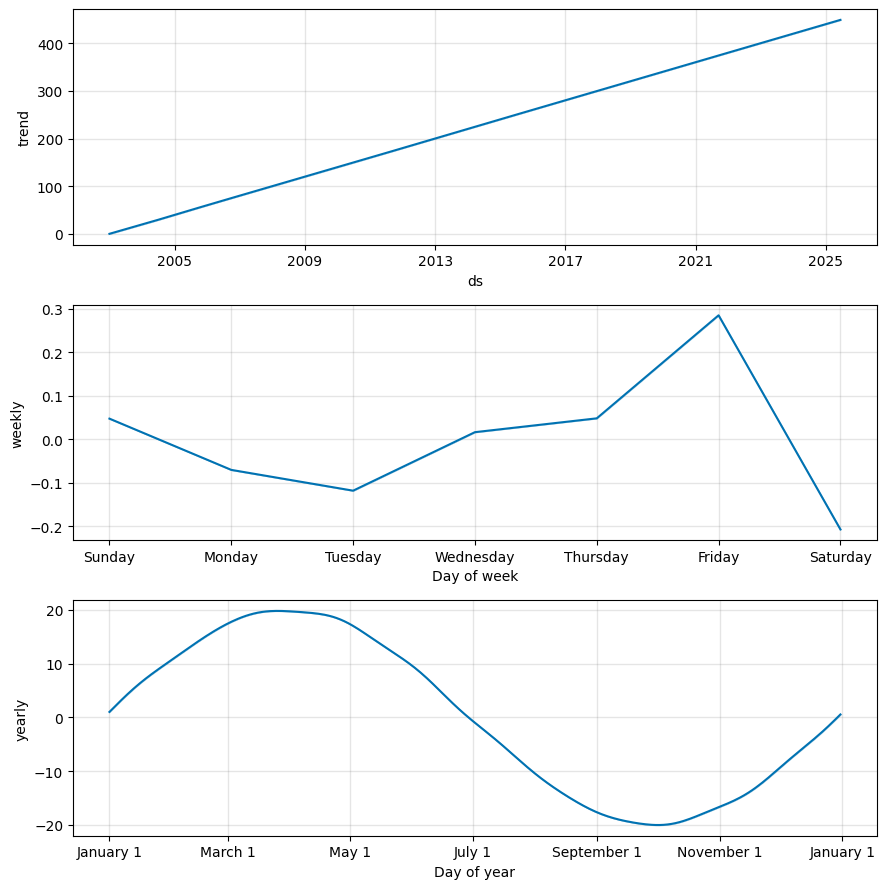

In [ ]:
from prophet import Prophet

# Load your time series data into a DataFrame
# Assuming the data is in a column named 'value' with a datetime index
# Replace 'your_data.csv' with your data source
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='date_column_name')

# Prepare data in a specific format with 'ds' (date) and 'y' (value) columns
data = df.reset_index()
data.rename(columns={'time': 'ds', 'value': 'y'}, inplace=True)

# Fit the Prophet model
model = Prophet()
model.fit(data)

future = model.make_future_dataframe(periods=900)
future.tail()

# Perform decomposition
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

## Independent Component Analysis (ICA)
ICA is a technique for separating a multivariate signal into additive, independent components. It can be applied to decompose time series data into its underlying sources.

/home/nipuna/miniconda3/envs/msc/lib/python3.12/site-packages/sklearn/decomposition/_fastica.py:598: UserWarning: n_components is too large: it will be set to 1
  warnings.warn(


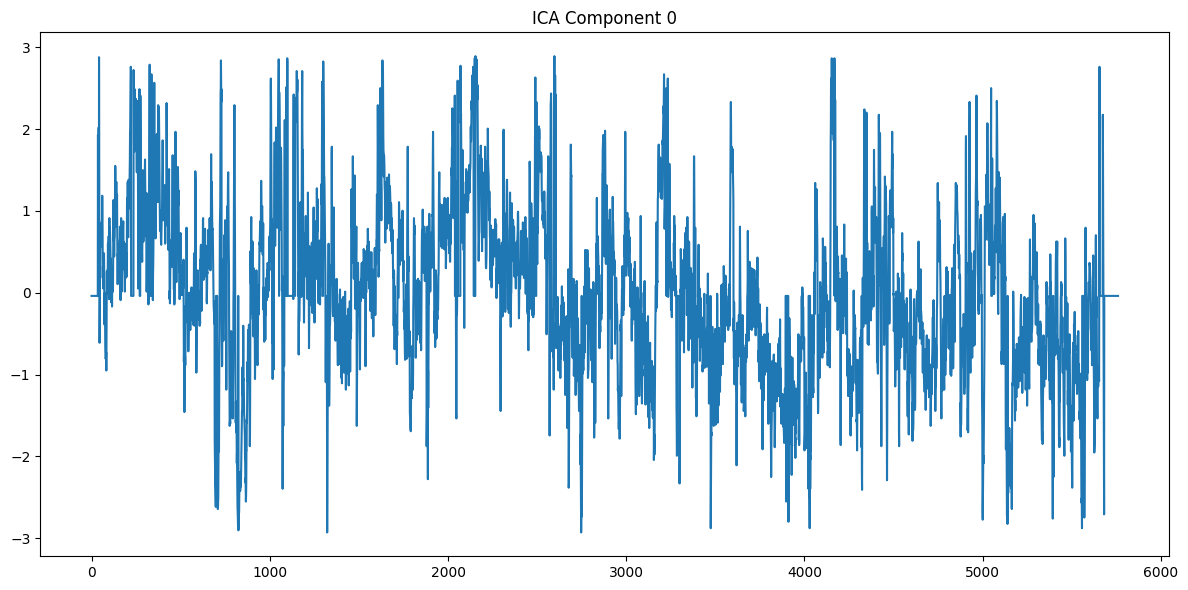

In [2]:
from sklearn.decomposition import FastICA

# Load your time series data into a DataFrame
# Assuming the data is in a column named 'value' with a datetime index
# Replace 'your_data.csv' with your data source
# data = pd.read_csv('your_data.csv', parse_dates=True, index_col='date_column_name')

# Perform Independent Component Analysis
ica = FastICA(n_components=3)
components = ica.fit_transform(df["Average T.F. Heater Serpentine Coil Inlet Temperature"].values.reshape(-1, 1))

# Plot the decomposed components
plt.figure(figsize=(12, 6))
for i in range(components.shape[1]):
    plt.subplot(components.shape[1], 1, i + 1)
    plt.plot(components[:, i])
    plt.title(f'ICA Component {i}')
plt.tight_layout()
plt.show()


If you prefer not to rely on visual inspection and want to quantify the contributions of different components for further analysis or feeding them into other algorithms, you can use various statistical metrics or indicators. Here are some common indicators you can use for understanding component contributions:
- **Autocorrelation Function (ACF):**
    - Calculate the ACF for each component (trend, seasonality, residual).
    - The ACF measures the correlation between the time series and its lagged values.
    - High ACF values at certain lags indicate the presence of seasonality.

- **Partial Autocorrelation Function (PACF):**
    - Calculate the PACF for each component.
    - PACF helps identify the order of the autoregressive term in time series models.
    - Significant PACF values at certain lags can indicate the presence of trend or seasonality.

- **Cross-Correlation Function:**
    - Calculate cross-correlation between your original time series and each component.
    - This can help quantify how well each component aligns with the original data at different lags.

- **Variance Explained:**
    - Calculate the proportion of variance explained by each component.
    - You can use metrics like R-squared or explained variance to quantify the contribution of each component to the overall variance.

- **Sum of Absolute Values:**
    - Calculate the sum of the absolute values of each component at different time points.
    - This can give you an idea of the magnitude of each component's contribution.

- **Percentage of Total Variation:**
    - Calculate the percentage of the total variation in the time series explained by each component.
    - This can be done by dividing the variance of each component by the total variance.

- **Component to Total Ratio:**
    - Calculate the ratio of each component to the total value at different time points.
    - This indicates the proportion of the time series that each component represents.

- **Information Criteria:**
    - Use information criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to compare the goodness of fit for models with and without specific components.
    - Lower information criteria values suggest a better fit and more significant component.